In [1]:
import numpy as np
import pandas as pd

In [2]:
ratings = pd.read_csv('../movielens-20m-dataset/rating.csv')

In [35]:
len(ratings)

20000263

In [33]:
ratings = ratings[['userId', 'movieId','rating']]

In [40]:
ratings_df = ratings.groupby(['userId','movieId']).aggregate(np.max)

In [41]:
len(ratings_df)

20000263

In [34]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [44]:
ratings_df.head()

rating
userId movieId        
1      2           3.5
       29          3.5
       32          3.5
       47          3.5
       50          3.5

In [9]:
len(ratings['userId'].unique())

138493

In [30]:
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)

In [31]:
type(count_ratings)

pandas.core.frame.DataFrame

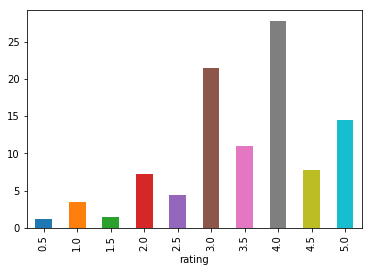

In [32]:
count_ratings['perc_total'].plot.bar()

In [5]:
movie_list = pd.read_csv('../movielens-20m-dataset/movie.csv')

In [6]:
len(movie_list)

27278

In [7]:
movie_list.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
tags = pd.read_csv('../movielens-20m-dataset/tag.csv')

In [46]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [47]:
genres = movie_list['genres']

In [48]:
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [49]:
genre_list = ""
for index,row in movie_list.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Horror',
 'Thriller',
 'Comedy',
 'Fantasy',
 'Action',
 '(no genres listed)',
 'Animation',
 'Western',
 'Drama',
 'Film-Noir',
 'Adventure',
 'Children',
 'Romance',
 'Crime',
 'Musical',
 'Mystery',
 'Sci-Fi',
 'Documentary',
 'War',
 'IMAX']

In [51]:
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in genres), axis = 1)

In [52]:
movies_with_genres.head()

,movieId,title,genres,Horror,Thriller,Comedy,Fantasy,Action,(no genres listed),Animation,...,Adventure,Children,Romance,Crime,Musical,Mystery,Sci-Fi,Documentary,War,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
